# DL Lab2 - Design and train a simple neural network - DIABETES DATASET    WITH TENSORFLOW PLAYGROUND OBSERVATIONS:

In [82]:
#imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import History
history = History()

In [6]:
!pwd

/content


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls

drive  sample_data


### To do 
- Data preparation
- Model Definition
- loss and optimiser definition
- train or fit and evaluate

In [9]:
import pandas as pd 
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv') 
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes_df.shape


(768, 9)

In [11]:
print(tf.__version__)

2.4.1


In [12]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#The dataset does not have any missing data.
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


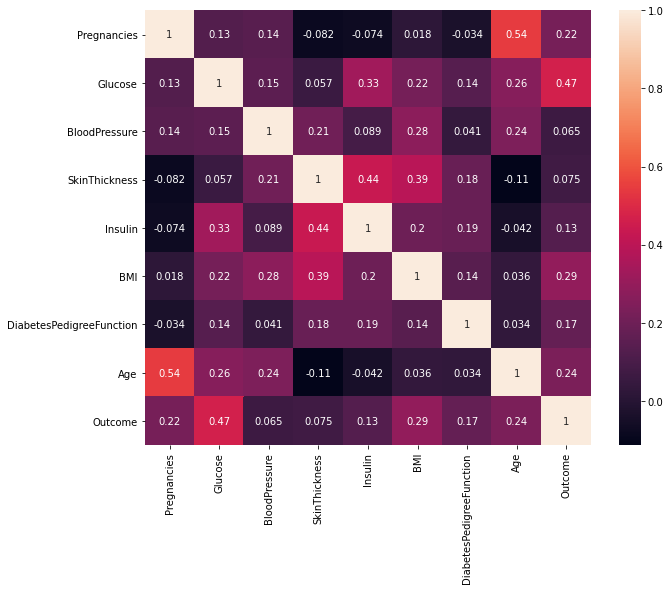

In [17]:
#Basic Visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes_df.corr(), annot=True, ax=ax)

In [18]:
#In the dataset, people diagnosed with diabetes had higher values for every attribute (mean value)
#defining all the columns showing which patient is diabetic or not
column_names = diabetes_df.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(diabetes_df.groupby(['Outcome'])[name].mean())
    print('*'*50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

In [19]:
#Preparation of the data
#Split the data into a training set, dev set and test set.
#Normalize the data.
X = diabetes_df.drop('Outcome', axis =1).values
y = diabetes_df.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [21]:
X_test.shape

(116, 8)

> -------

In [23]:
import numpy as np
import pandas as pd
y_train[1]

0

In [25]:
y_test[0]

0

In [26]:
y_train[:60]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [27]:
L = pd.DataFrame(y_train)
L[0].value_counts()

0    345
1    192
Name: 0, dtype: int64

In [35]:
X_train= X_train/255
X_test= X_test/255 # coverting all from scale 0 to 255 --> 0 to 1
X_train.shape

(537, 8)

In [36]:
X_test.shape

(116, 8)

In [38]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [39]:
# Initialize the constructor
model = Sequential()
# Define model architecture
model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=2000, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6425
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6425
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6425
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6425
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6425
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6425
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6425
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.6425
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6425
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6425
Epoch 11/100
1/1 [===========

In [45]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.629
Loss: 0.661


In [46]:
y_predict = model.predict(X_test)
y_predict[0]

array([6.4246005e-01, 3.5608384e-01, 1.2015342e-04, 1.3679852e-04,
       2.4808673e-04, 5.3183991e-05, 6.0911407e-05, 1.3907952e-04,
       1.7957372e-04, 5.1838334e-04], dtype=float32)

In [47]:
np.argmax(y_predict[0])

0

> -------

##### Train the model

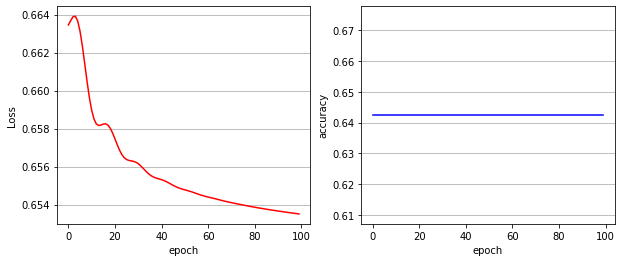

In [48]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r')

plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
#plt.savefig("mnist_training")

In [50]:
# without softmax
predictions = model(X_train[:1]).numpy()
predictions

array([[6.4189851e-01, 3.5660484e-01, 1.2379987e-04, 1.4087552e-04,
        2.5491632e-04, 5.4949738e-05, 6.2907973e-05, 1.4321304e-04,
        1.8474417e-04, 5.3123548e-04]], dtype=float32)

In [51]:
predictions.sum()

1.0

In [52]:
# with softmax
predictions_with_softmax = tf.nn.softmax(model(X_train[:1])).numpy()
predictions_with_softmax

array([[0.16770309, 0.12607808, 0.08827177, 0.08827329, 0.08828335,
        0.0882657 , 0.0882664 , 0.0882735 , 0.08827715, 0.08830775]],
      dtype=float32)

In [53]:
predictions_with_softmax.sum()

1.0000001

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               7056      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 86,566
Trainable params: 86,566
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Initialize the constructor
model2 = Sequential()
# Define model architecture
model2.add(Dense(784,activation='tanh'))
model2.add(Dense(100, activation ='tanh'))
model2.add(Dense(10,activation='softmax'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))


In [74]:
model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [75]:
history = model2.fit(X_train, y_train, epochs=200, batch_size=20000, verbose=1)


Epoch 1/200
1/1 [==============================] - 0s 446ms/step - loss: 0.8146 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7847 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7641 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7482 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7360 - accuracy: 0.6425
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7258 - accuracy: 0.6425
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.7162 - accuracy: 0.6425
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 0.7078 - accuracy: 0.6425
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6998 - accuracy: 0.6425
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.6425
Epoch 11/20

In [76]:
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.629
Loss: 0.638


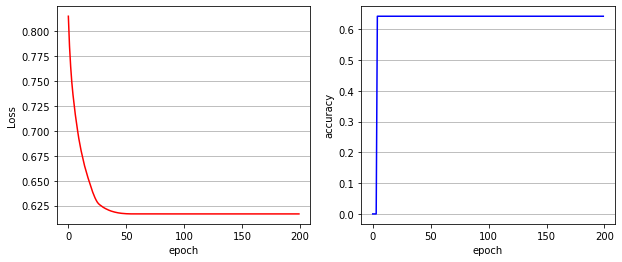

In [77]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r')

plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
#plt.savefig("mnist_training")

In [78]:
# without softmax
predictions = model(X_train[:1]).numpy()
predictions

array([[7.6613170e-01, 2.3385671e-01, 1.3547274e-06, 1.5926901e-06,
        1.9058532e-06, 9.0106272e-07, 9.8346504e-07, 1.4474637e-06,
        1.2681901e-06, 2.1918922e-06]], dtype=float32)

In [79]:
predictions.sum()

1.0

In [80]:
# with softmax
predictions_with_softmax = tf.nn.softmax(model(X_train[:1])).numpy()
predictions_with_softmax

array([[0.18847534, 0.11068544, 0.0876049 , 0.08760492, 0.08760494,
        0.08760485, 0.08760486, 0.0876049 , 0.0876049 , 0.08760497]],
      dtype=float32)

In [81]:
predictions_with_softmax.sum()

1.0

**OUTPUT:**

Performing DNN technique on Diabetes dataset and calculating its accuracy.Previously accuracy is only around 62% with data loss =0.661 and epoch =100 but after changing epochs of dataset we got **accuracy** of **64.25** with loss = 0.638. The line ("x_train, y_train, epochs=200, batch_size=20000, verbose=1") shows that the data is trained with 200 epochs having verbose =1. Score of the model differ everytime as we train it. Because it is fed with different point of data using cross_validataion function. So the t of the line changes as the accuracy with epoch of 200 and activation function is relu with 100 neurons in the FIRST hidden layer specied in create model cell and hence the difference between the graphs can be seen easily.

**Tensorflow Playround Observation  OUTPUT:**
--------------------------------------------------------------------------------------------
-------------------------------
**For Circle:**
I/p L  : x1-x2   **|**   Hidden L -- Neurons: 2 Hidden L -- 5N(3--2)   **|**     Epochs:304    **|**    Act FUNC: Tanh   **|**   Learning rate :0.03   ** |**    
Training loss:0 .007  **|**   Test loss: 0.004   ** |**   Batch size: 10     
**|**       Tr-Test %:  50%





**For Spiral Dataset:**
I/p L  : x1-x2   **|**Hidden L -- Neurons:  Hidden L -- 12(2--5--3--2)N   **|** Epochs:230   **|**    Act FUNC: Tanh   **|**   Learning rate :0.03   ** |**    
Training loss:0 .475   **|**   Test loss: 0.474   ** |**   Batch size: 10        
**|**       Tr-Test %  50%






**For Gaussian Dataset:**
I/p L  : x1-x2     **|**     Hidden L -- Neurons: 3Hidden L --7(3--2--2      ) **|**      Epochs:536      **|**       Act FUNC: Tanh            **|**   Learning rate :0.0 1          ** |**    
  Training loss:0 .005          **|**          Test loss: 0.006** |**       Batch size: 10      
**|**       Tr-Test %  50%





**For Exclusive or:**
I/p L  : x1-x2     **|**     Hidden L -- Neurons: 2 Hidden L -- 7N--(3-2--2    )**|**       Epochs:182      **|**    Act FUNC: Tanh              **|**   Learning rate :0.03          ** |**    
Training loss:0 .001       **|**   Test loss: 0.001                ** |**   Batch size: 10 
      **|**       Tr-Test %  :60%